<a href="https://colab.research.google.com/github/EmanueleFittipaldi/Education-and-Resources/blob/main/Data_Structures_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Structures

## Abstract Data Type

L' Abstract Data Type (ADT) è un modello matematico per tipi di dato. Viene definito attraverso le operazioni che mette a disposizione dell'utente, e ne determinano il suo *comportamento*.

L' ADT differisce dalla struttura dati in quanto quest'ultima ne è la rappresentazione concreta dal punto di vista dell'implementatore, non dell'utente.

## Stack


Lo stack è una struttura dati che segue il principio *last-in, first-out (LIFO)*. 

Un utente può solo: 
- Inserire nuovi elementi nello stack tramite l'operazione **push**
- Estrarre l'ultimo elemento inserito tramite l'operazione **pop**

**Esempio pratico:**
Una analogia che ci aiuta a comprendere lo stack è una pila di libri. Prendere il libro in cima è immediato, così aggiungerne un altro. Se vogliamo invece un libro che sta nel mezzo, dobbiamo prima togliere tutti gli altri libri sopra di esso.

**Esempi di uso:**
- Un brower per tenere traccia dei siti web visitati più di recente, inserisce (*fa il push*) ogni nuovo sito web visitato in uno stack. Quando l'utente vuole ritornare al sito precedente, usa il bottone "back" che effettua il *pop* dallo stack ottenendo il sito web visitato più di recente.
- Un editor di testo allo stesso modo fornisce la possibilità di poter fare "undo" di operazioni eseguite sul testo. L'operazione di "undo" può essere realizzata inserendo il corpo del testo in uno stack ad ogni cambiamento.

### Stack Abstract Data Type

Formalmente uno stack è un ADT tale che l'istanza **S** supporta i seguenti metodi:
- **S.push(e):** Aggiunge un elemento *e* in cima allo stack S.
- **S.pop():** Rimuove e ritorna l'elemento in cima allo stack S. Ritorna un errore se lo stack è vuoto.

Inoltre è possibile definire dei metodi aggiuntivi per convenienza:
- **S.top():** Ritorna il riferimento all'elemento in cima allo stack S, senza rimuoverlo; ritorna un errore se lo stack è vuoto.
- **S.is_empty():** Ritorna True se lo stack S non contiene alcun elemento.
- **len(S):** Ritorna il numero di elementi nello stack S; in Python, lo implementiamo con il metodo speciale \_ \_len\_ \_.

Gli elementi aggiunti ad uno stack possono essere di un qualsiasi tipo arbtirario.

### Implementazione dello stack

Le liste di Python potrebbero già da sole essere utilizzate come se fosse uno stack, ma formalmente le liste includono anche dei comportamenti che non sono possibili in uno stack. Un esempio è l'accesso diretto agli elementi utilizzando un indice. Ciò andrebbe a rompere l'astrazione che vogliamo raggiungere avendo definito l'ADT stack.

Quello che facciamo è costruire una interfaccia pubblica messa a disposizione per gli utenti. In questo modo facciamo **Information Hiding**.

In [1]:
class Empty(Exception):
  """Errore nel tentativo di accedere ad un elemento da un contenitore vuoto."""
  pass

In [2]:
class Stack:
  """LIFO Stack utilizzando una lista Python come meccanismo di memorizzazione sottostante."""
  def __init__(self):
    """Crea uno stack vuoto."""
    self._data = []                 # istanza di una lista privata

  def __len__(self):
    """Ritorna il numero di elemento in uno stack."""
    return len(self._data)

  def is_empty(self):
    """Ritorna True se lo stack è vuoto."""
    return len(self._data)==0

  def push(self,e):
    """Aggiunge un elemento e in cima allo stack."""
    self._data.append(e)            # un nuovo item viene aggiunto in fondo alla lista

  def pop(self):
    """Rimuove e ritorna l'eleemnto in cima allo stack. Solleva una eccezione se lo stack è vuoto."""
    if self.is_empty():
      raise Empty('Stack is empty')
    return self._data.pop()         # utilizziamo il metodo pop() delle liste di Python. Rimuove l'ultimo item dalla lista

  def top(self):
    """Ritorna(ma non rimuove) l'elemento in cima allo stack. Solleva una eccezione se lo stack è vuoto."""
    if self.is_empty():
      raise Empty('Stack is empty')
    return self._data[-1]           # ritorna l'ultimo elemento dalla lista

### Esempio di uso

In [8]:
S = Stack()
S.push(5)
S.push(3)
print(len(S))
print(S.pop())
print(S.is_empty())
print(S.pop())
print(S.is_empty())
#print(S.pop())     # Decommenta questa riga per far lanciare l'eccezione Empty

2
3
False
5
True


### Complessità temporale e spaziale

- **S.push(e)** $\;\;O(1)$
- **S.pop()**   $\;\;O(1)$
- **S.top()** $\;\;O(1)$
- **S.is_empty()** $\;\;O(1)$
- **len(S)** $\;\;O(1)$

La complessità spaziale di uno stak è $O(n)$ dove $n$ è il numero degli elementi correnti nello stack.

## Queue

È una struttura dati che segue il principio del *first-in, first-out (FIFO)*. Questo significa che possiamo aggiungere elementi **in coda** in ogni momento, ma soltanto l'elemento **in testa** può essere rimosso, ovvero l'elemento inserito per prima.

**Esempio pratico:** Una analogia è quella di una coda di persone in attesa di entrare in un parco di divertimento. Le persone che vogliono entrare nel parco si mettono in coda alla fila mentre quelle che entrano nel parco sono quelle in testa alla fila.

**Esempio di uso:**
- Un gestore di chiamate in un centro di servizio clienti
- Una lista di attesa in un ristorante
- Documenti in attesa di essere stampati in una stampante in rete
- Un Web server che risponde a delle richieste

Sono tutte situazioni in cui *l'ordine di arrivo* è importante

### Queue Abstract Data Type

Formalmente l'ADT queue definisce una collezione che mantiene oggetti in una sequenza, dove l'accesso e la cancellazione sono ristretti al **primo** elemento nella queue, e l'inserimento è possibile effettuarlo solo in fondo alla queue.

Formalmente l'ADT queue fornisce i seguenti metodi per una istanza Q:
- **Q.enqueue(e):** Aggiunge un elemento e in fondo alla queue Q
- **Q.dequeue():** Rimuove e ritorna il primo elemento dalla queue Q; Viene sollevato un errore se la queue è vuota.

È inoltre possibile definire i seguenti metodi di supporto:
- **Q.first():** Ritorna il riferimento dell'elemento in testa alla queue Q, senza eliminarlo. Viene sollevato un errore se la queue è vuota.
- **Q.is_empty():** Ritorna True se la queue Q non contiene alcun elemento.
- **len(Q)** Ritorna il numero di elementi nella coda Q; in Python lo implementiamo utilizzando il metodo speciale \_ \_len\_ \_. 

### Implementazione della queue

**Nota su enqueue e dequeue:**
Per aggiungere un elemento in fondo alla queue abbiamo bisogno di determinare l'indice in cui piazzare il nuovo elemento. La posizione disponibile in cui inserire l'elemento è data dalla formula 

```
avail = (self._front + self._size) % len(self._data)
```
Nota che stiamo utilizzando self._size in quanto sappiamo esistere a *priori* rispetto l'inserimento del nuovo elemento.

Esempio:
Consideriamo una queue con:
- capacità 10
- dimensione corrente 3
- primo elemento in posizione 7

Quindi i 3 elementi presenti nella coda sono in posizione 7, 8 e 9. Il nuovo elemento deve essere piazzato nella posizione (front+size) ovvero (7+3) = 10.
Dato che usiamo l'array in maniera circolare aggiungiamo il modulo rispetto la lunghezza della queue. Quindi 10 % 10 = 0. Dunque l'elemento dovrà essere inserito nella posizione 0.

**Nota su resize della queue:**
Dopo aver creato un riferimento temporaneo alla lista vecchia, allochiamo una nuova lista che ha una dimensione doppia, e ricopiamo i valori dalla vecchia lista alla nuova lista. Quando ricopiamo questi valori, ri-allineiamo intenzionalmente la variabile che tiene traccia della testa della queue con l'indice 0 nel nuovo array.



 

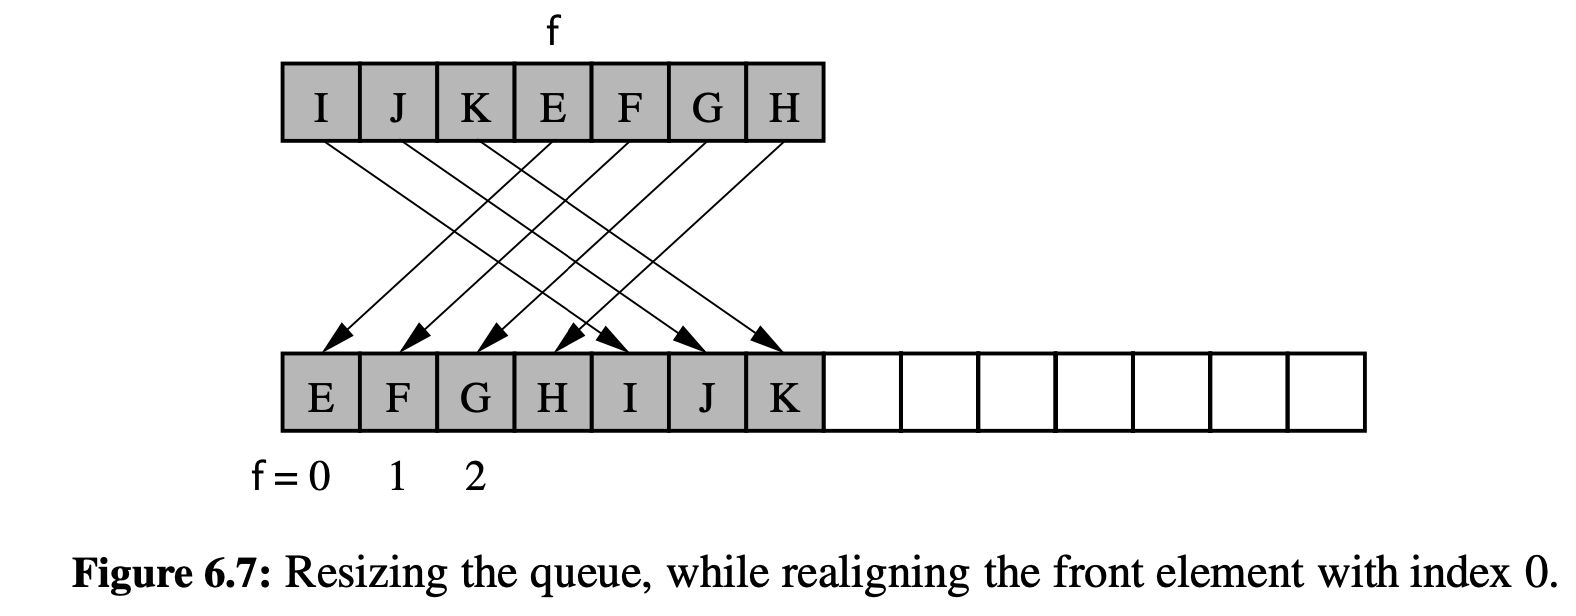

In [17]:
class Queue:
  """FIFO queue implementata utilizzando le liste di Python come meccanismo di memorizzazione sottostante."""
  DEFAULT_CAPACITY = 10     # modesta capacità per tutte le nuove queue

  def __init__(self):
    """Creo una queue vuota."""
    self._data = [None] * Queue.DEFAULT_CAPACITY
    self._size = 0
    self._front = 0

  def __len__(self):
    """Ritorno il numero degli elementi nella queue."""
    return self._size

  def is_empty(self):
    """Ritorno True se la queue è vuota."""
    return self._size==0
  
  def first(self):
    """Ritorna (ma non rimuove) l'elemento in testa alla queue. Solleva una eccezione se la queue è vuota."""
    if self.is_empty():
      raise Empty('Queue is empty')
    return self._data[self._front]

  def dequeue(self):
    """Rimuove e ritorna l'elemento in testa alla queue. Solleva una eccezione se la queue è vuota."""
    if self.is_empty():
      raise Empty('Queue is empty')
    answer = self._data[self._front]
    self._data[self._front] = None      # per aiutare la garbage collection
    self._front = (self._front +1 ) % len(self._data) # utiliziaamo l'array circolarmente quindi incrementiamo modulo lunghezza del vettore.
    self._size -=1
    if 0 <self._size <len(self._data)//4:
      self._resize(len(self._data)//2)
    return answer

  def enqueue(self, e):
    """Aggiunge un elemento in coda alla queue."""
    if self._size == len(self._data):
      self._resize(2*len(self._data))   # raddoppio le dimensioni dell'array
    avail = (self._front + self._size) % len(self._data)
    self._data[avail] = e
    self._size +=1

  def _resize(self, cap):       # assumiamo cap >= len(self)
    """Ridimensiona in una nuova lista di capacità >= len(self)."""
    old = self._data # teniamo traccia della lista esistente
    self._data = [None] * cap # allochiamo una nuova lista con una nuova capacità
    walk = self._front
    for k in range(self._size): # consideriamo soltanto gli elementi esistenti
      self._data[k] = old[walk] # shiftiamo intenzionalmente gli indici
      walk = (1+walk) % len(old) # usiamo la taglia vecchia come modulo
    self._front = 0 # front è stato riallineato


### Esempio di uso

In [22]:
Q = Queue()
Q.enqueue(5)
Q.enqueue(3)
print(len(Q))
print(Q.dequeue())
print(Q.is_empty())
print(Q.dequeue())
#print(Q.dequeue()) #decommentare per sollevare l'eccezione


2
5
False
3


### Complessità temporale e spaziale
- **Q.enqueue(e):** $\;\;O(1)$
- **Q.dequeue():** $\;\;O(1)$
- **Q.first():** $\;\;O(1)$
- **Q.is_empty():** $\;\;O(1)$
- **len(Q):** $\;\;O(1)$

La complessità temporale è $O(n)$ dove $n$ è il numero degli elementi correnti all'interno della queue.

## Binary Tree

Un binary tree è un albero con le seguenti proprietà:
- Ogni nodo ha al più due figli.
- **left child** e **right child**
- Il left child precede il right child
- I valori del left child e del right child sono ordinati. Questo rende un binary tree un albero ordinato.

Il sottoalbero (subtree) radicato nel left child e right child viene chiamato **left subtree** e **right subtree**.